# Brain Regions associated with Pain: fMRI Data Visualization Project
- **Student Name:** Sude Özkara  
- **Date Completed:** 14-12-2024
- **Data Visualized:** [Neurosynth Pain Data](https://neurosynth.org/analyses/terms/pain/)





---
### Installation of Required Python Libraries
First things first, I installed the required libraries to the current python environment to ensure the code runs without exceptions.\

I created a requirements.txt file which includes every necessary library for this project.\

You can install it from the root directory with the following command:

`pip install -r requirements.txt`

---
## Import Required Libraries
I used `nibabel`, `nilearn`, `matplotlib`, and `numpy` for data processing and visualization and 'os' for file file operations.

In [1]:
# Import requried libraries for this coursework
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn.plotting import plot_stat_map
from matplotlib.colors import LinearSegmentedColormap # to create my custom color map
import glob

---
## Load and Process Data
The code cell below declares a function which automatiacally retrieves paths to '.nii' files

In [2]:
# This function will return a tuple of two strings, each will indicate the corresponding anatomical and functional file paths.
# The required parameters are: 
# directory: the directory path to scan for files.
# anatomical_keyword: Keyword to identify the anatomical file.
# functional_keyword: Keyword to identify the functional file.
# extension: The file extension to look for, I set default to ".nii" as we are looking for .nii files for this coursework.

# I designed this function to avoid hardcoding and being suitable for multiple purposes.

def find_mri_files(directory, anatomical_keyword="anatomical", functional_keyword="uniformity", extension=".nii"):
    

    # I used glob to search for all files with the given extension in the directory and subdirectories
    files = glob.glob(os.path.join(directory, f"*{extension}"))
    
    for file in files:  # searching over the matching files
        file_lower = os.path.basename(file).lower()  # this code gets the file name in lowercase 
        if anatomical_keyword in file_lower:  # Checks if the file matches the anatomical keyword
            anatomical_file = file
        elif functional_keyword in file_lower:  # Checks if the file matches the functional keyword
            functional_file = file

    return anatomical_file, functional_file # Return the file paths

Automatically locate `.nii` files and load them into the variables.

In [3]:
# My search directory is data folder in the root folder.
search_directory = "../data"

# Retrieve the data file paths with the function that I defined before.
anatomical_data, functional_data = find_mri_files(search_directory)    
print(f"Anatomical Data File Path: {anatomical_data}")
print(f"Functional Data File Path: {functional_data}")

Anatomical Data File Path: ../data/anatomical.nii
Functional Data File Path: ../data/pain_uniformity-test_z_FDR_0.01.nii


---
## Brain Map Visualization
The code below declares a function to visualize the MRI data, it leverates the plot_stat_map function in nilearn.plotting to plot the MRI data.

The following figure shows brain regions associated with the concept "pain." The functional data is overlayed on anatomical brain scans.


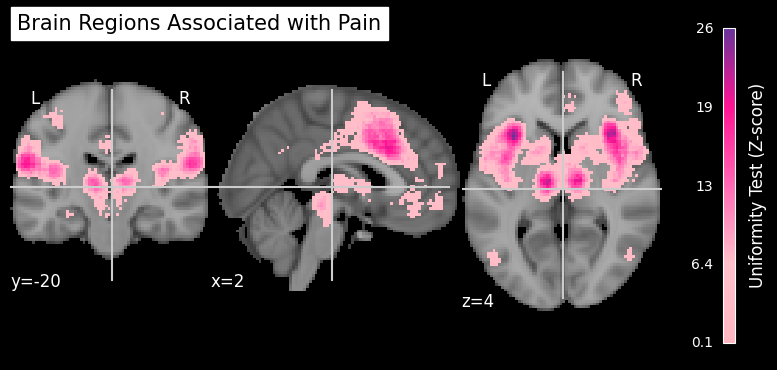

In [4]:
def visualize_scan(functional_data_file_path, anatomical_data_file_path):
    # functional_data_file_path: File path pointing to the functional data.
    # anatomical_data_file_path: File path pointing to the anatomical data.
    
    # I wanted to define a custom bright pink colormap to use in my brain image visualization.
    bright_pink_cmap = LinearSegmentedColormap.from_list(
        "bright_pink",
        ["lightpink", "pink", "hotpink", "deeppink","rebeccapurple"])

    # plot_stat_map: a function in nilearn library which creates the image for the brain MRI data.
    # stat_map_img: The statistical map image, i will use functional data here as described in the assignment pdf.
    # bg_img: The background image to plot on top off, i will use anatomical data as it is indicated in the assignment pdf.
    # I wanted to make some customizations:
    # cut_coords: The coordinates specifying the point where the cut is performed. I have chosen (2, -20, 4) as it provides the most visually appealing representation of the data.
    # title: Brain Regions Associated with Pain 
    # cmap: I customized a colormap featuring shades of pink and purple to enhance visual clarity and aesthetics. In this colormap, darker shades represent regions of the brain with higher activation or usage.
    # threshold: The voxel threshold which is set to 0.1 to exclude the values below that level as it indicated in the assignment.
    # black_bg: To make the background black
    # _cbar.set_label: to write a label for the color bar

    plot_stat_map(functional_data_file_path, 
                  bg_img=anatomical_data_file_path, 
                  cmap=bright_pink_cmap, 
                  cut_coords=(2,-20,4), 
                  title="Brain Regions Associated with Pain", 
                  threshold=0.1, 
                  black_bg=True,
                  )._cbar.set_label('Uniformity Test (Z-score)', fontsize=12, color='white', labelpad=10)
    
# Using the function to visualize data, with the data file parameters.
visualize_scan(functional_data_file_path=functional_data, anatomical_data_file_path=anatomical_data)

---
## Histogram of Functional Data Values
The code below declares another function to plot the histogram, the function primarily leverages matplotlib.pyplot to plot the histogram

This histogram represents the distribution of positive values in the functional MRI data, helping to analyze the strength of associations.

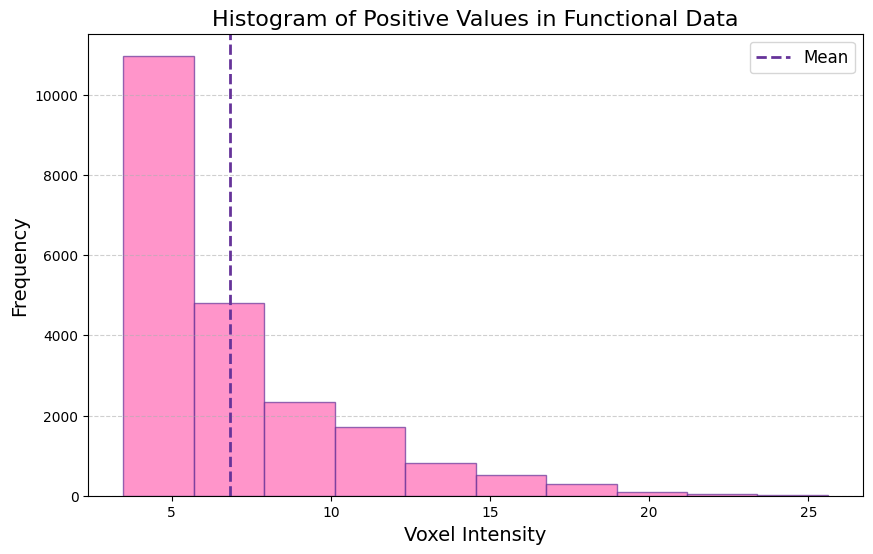

Mean Value: 6.818879290537904


In [5]:
# A function to plot the histogram of functional data.
# function_data_file_path: the filepath pointing to the functional data.

def plot_histogram_data(functional_data_file_path):
    
     img = nib.load(functional_data_file_path) # Load the image with nibabel.
     data = img.get_fdata() # Retrieve the functional data from the img.

     positive_values = data[data > 0] # Filter the data to only contain positive (>0) values

     # I defined the histogram
     plt.figure(figsize=(10, 6))
     plt.hist(positive_values, color='hotpink', alpha=0.7, edgecolor='rebeccapurple')

     plt.title("Histogram of Positive Values in Functional Data", fontsize=16) # Setting title of the plot
     plt.xlabel("Voxel Intensity", fontsize=14) # set the label title of X axis.
     plt.ylabel("Frequency", fontsize=14) # set the label title of Y axis.
     plt.grid(axis='y', linestyle='--', alpha=0.6) # create a grid with dashed-lines for better visualization.

     mean_value = np.mean(positive_values) # I wanted to calculate the mean value of positive values.

     # I added a vertical line on the x-axis to represent the mean value of the data. 
     # This line provides a visual reference for the central tendency, helping to identify where most of the data clusters. 
     plt.axvline(mean_value, color='rebeccapurple', linestyle='dashed', linewidth=2, label='Mean')

     # I setted a legend to indicate what purple line presents.
     plt.legend(fontsize=12)
     
     plt.show()
     print(f"Mean Value: {mean_value}")

# I used the function to plot the histogram data of the function data.
plot_histogram_data(functional_data_file_path=functional_data)